# Things I want to Accomplish with this Dataset

### Objectives
---
- See which artists appear in which decades
- See who was in the Billboard Top 100 the most (Done)
- See who has appeared more than 10 times (Done)
- Use Wordcloud to visualize which words were used most by decade (Done)

### Importing the Necessities

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import regex as re
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Importing the Billboard Top 100 Data
lyrics = pd.read_csv('billboard_lyrics_1964-2015.csv', encoding = 'Latin-1')

In [52]:
# lyrics.head()

### Setting up the Data for Basic Info checking

In [53]:
# Grouping the Data by Artist
artist = lyrics.groupby(by='Artist')
# A method use to call on a prticular artist
# artist.get_group('madonna')

In [54]:
# Grouping the Data by Year
year = lyrics.groupby(by='Year')
# Checking to see if it groups by Year properly
# year.get_group(2015)

### Finding who has the most hits on the Billboard Top 100

In [36]:
# Making an empty dictionary
artist_count = dict()

#Using iterrows over the Pandas DataFrame to add up the count for each Artist in the Dataset
for index, row in lyrics.iterrows():
#     If the Artist isn't yet in the Dictionary, it adds them. Otherwise it increments plus one.
    if row['Artist'] not in artist_count:
        artist_count[row['Artist']] = 1
    else:
        artist_count[row['Artist']] += 1

In [37]:
# Finding the max value in the Dictionary
max(artist_count.values())

35

In [38]:
# Checking to see if more than one Artist has the max value and if so, which Artist is it
for i, j in artist_count.items():
    if artist_count[i] == 35:
        print(i)

madonna


### Charting the Artists who made the Billboard Top 100 more than 10 times

In [56]:
# A Dictionary Comprehension used to make a new Dictionary with Artists that have been on the Billboard more than 10 Times
major_artists = {key: value for (key, value) in artist_count.items() if value >= 10 }
# print(len(major_artists))

# Sorting the Dictionary from Max number to 10 so it is easier to interpret on a Bar chart
major_artists_sort = {k: v for k, v in sorted(major_artists.items(), key=lambda item: item[1], reverse=True)}
# print(major_artists_sort)

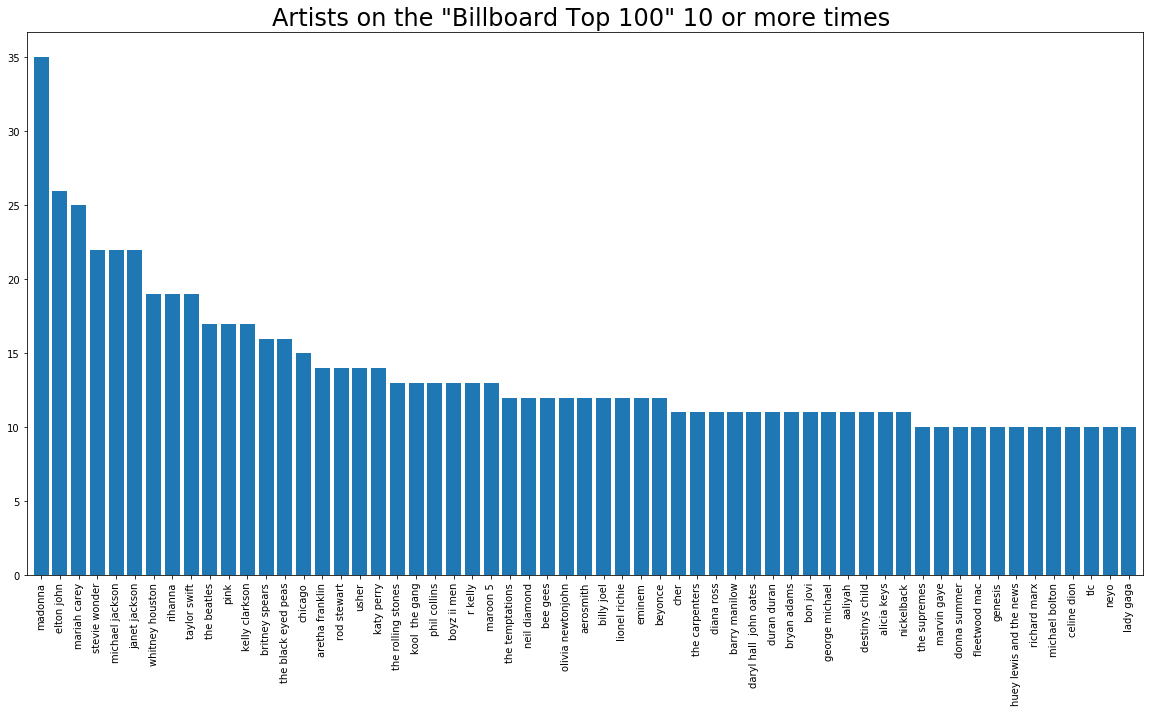

In [62]:
# Plotting the Dictionary onto a Bar Chart
plt.figure(figsize = (20,10))
plt.bar(major_artists_sort.keys(), major_artists_sort.values())
plt.xticks(rotation=90)
plt.xlim(-0.75, 58.75)
plt.title('Artists on the "Billboard Top 100" 10 or more times ', size = 24)
plt.show()

# Playing with WordClouds

In [45]:
# Checking how to isolate lyrics
# lyrics.iloc[534]['Lyrics']

In [44]:
# Checking how to isolate artists without groupby
# lyrics.loc[lyrics['Artist'] == 'madonna']

### Testing out WordCloud with a Single Artist

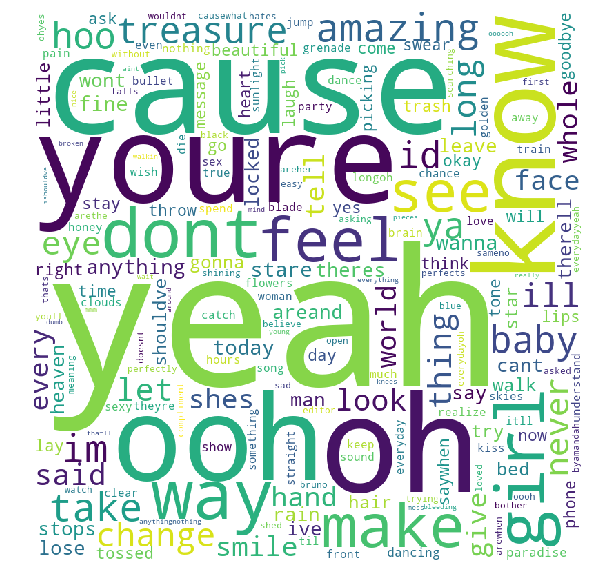

In [32]:
# Testing out WordCloud with just a single artist
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artist.get_group('bruno mars').Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Creating a WordCloud with all the lyrics from the Top Artists in the dataset

In [41]:
# Creating a new DataFrame just with the artists that were on the Top Billboard 100 more than 10 times
top_artists = pd.DataFrame(columns = ['Rank', 'Song', 'Artist', 'Year', 'Lyrics', 'Source'])

for artist in major_artists:
    top_artists = top_artists.append(lyrics.loc[lyrics['Artist'] == artist])


In [43]:
# top_artists.head()

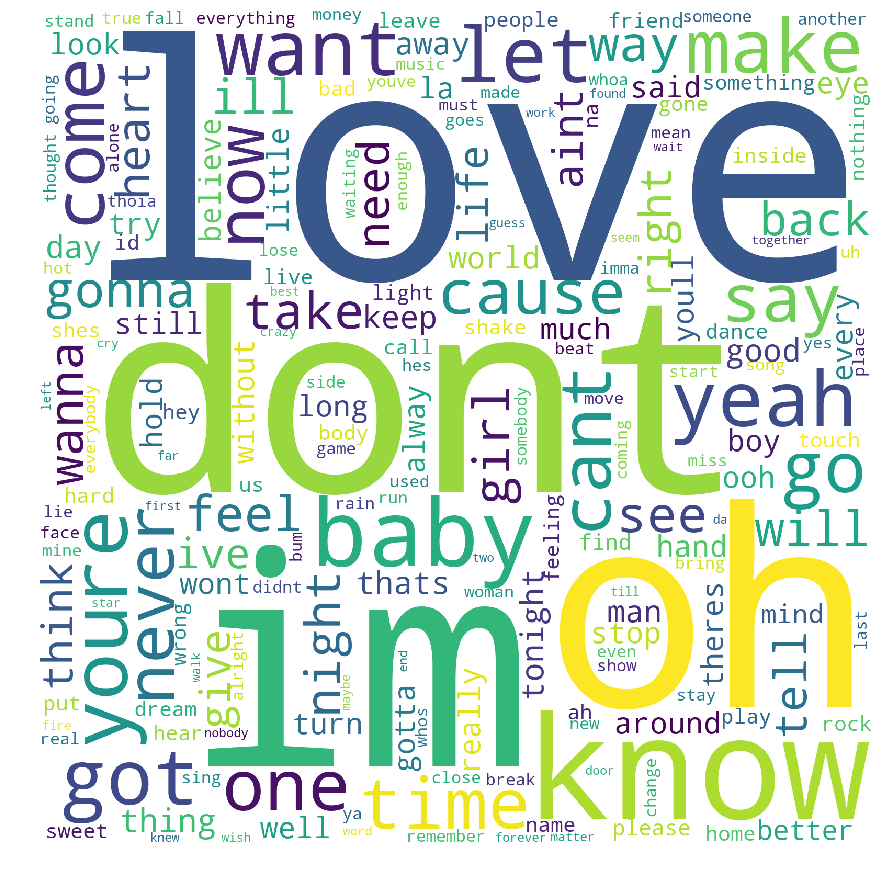

In [127]:
# Creating a WordCloud using the lyrics from all the artists that were in the Top Billboard 100 more than 10 times

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in top_artists.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 2,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Separating Artists by Decades

In [46]:
artists_1960s = lyrics[lyrics['Year'] < 1970]
# artists_1960s.head()

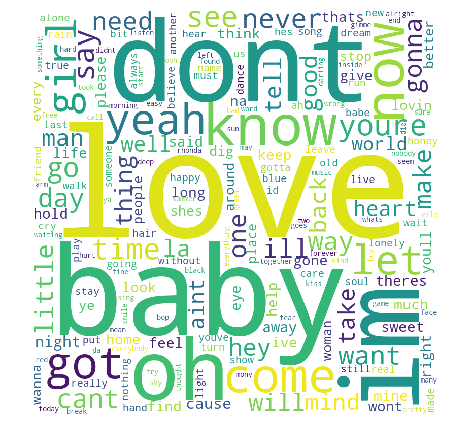

In [57]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artists_1960s.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 1,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 

In [47]:
artists_1970s = lyrics[(lyrics['Year'] >= 1970) & (lyrics['Year'] < 1980)]
# artists_1970s.head()

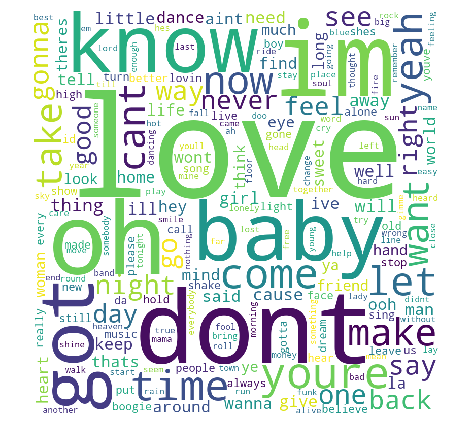

In [58]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artists_1970s.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 1,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 

In [48]:
artists_1980s = lyrics[(lyrics['Year'] >= 1980) & (lyrics['Year'] < 1990)]
# artists_1980s.head()

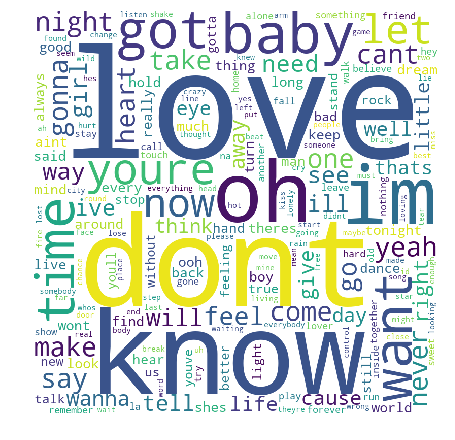

In [59]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artists_1980s.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 1,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 

In [49]:
artists_1990s = lyrics[(lyrics['Year'] >= 1990) & (lyrics['Year'] < 2000)]
# artists_1990s.tail()

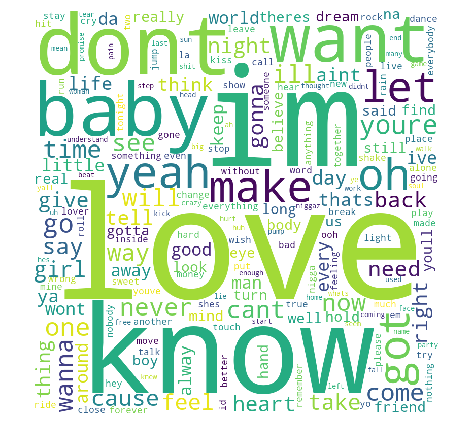

In [60]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artists_1990s.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 1,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 

In [50]:
artists_2000s = lyrics[(lyrics['Year'] >= 2000) & (lyrics['Year'] < 2010)]
# artists_2000s.head()

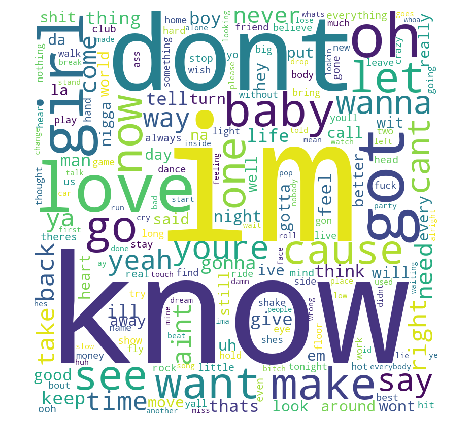

In [61]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artists_2000s.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 1,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 

In [51]:
artists_2010s = lyrics[lyrics['Year'] >= 2010]
# artists_2010s.head()

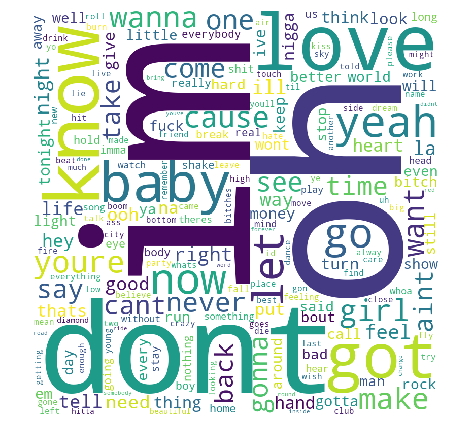

In [62]:
comment_words = ' '
stopwords = set(STOPWORDS) 

for val in artists_2010s.Lyrics: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                relative_scaling = 0.5,
                collocations = False,
                scale = 1,
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
# plt.show() 